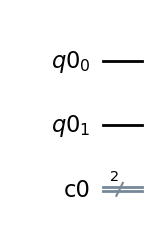

In [1]:
# Create a Quantum Circuit 
from qiskit import *
# declare a quantum register with 2 qubits
qr=QuantumRegister(2)
# declare a classical register with 2 bits
cr=ClassicalRegister(2)
# create a quantum circuit with 2 qubits and 2 bits
circuit=QuantumCircuit(qr,cr)
# draw the circuit
%matplotlib inline
circuit.draw(output='mpl')

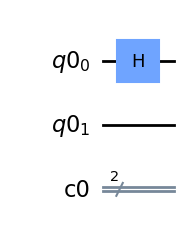

In [2]:
# Apply a Hadamard gate to first qubit
circuit.h(qr[0])
circuit.draw(output='mpl')

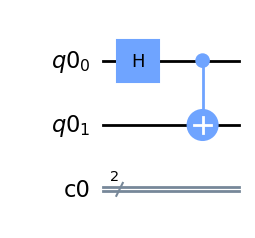

In [3]:
# Apply a controlled-X gate from qubit 0 to qubit 1
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

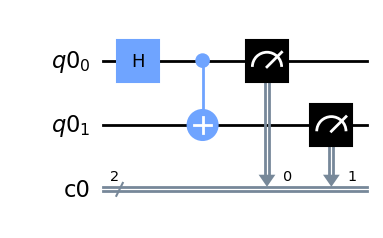

In [4]:
# Measuring qubits
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [5]:
# Executing the circuit on the simulator
simulator=Aer.get_backend('qasm_simulator')
results=execute(circuit,backend=simulator,shots=1000).result()

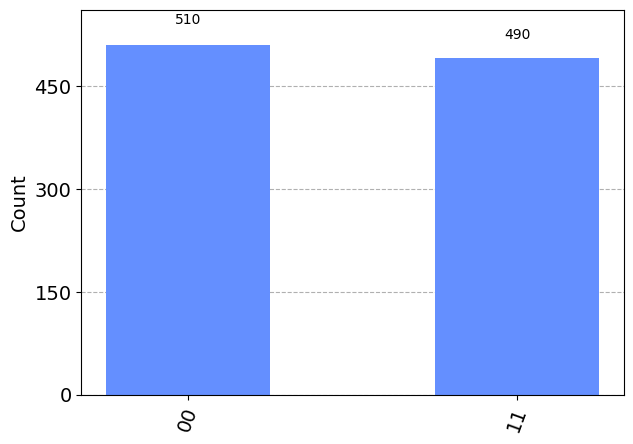

In [6]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(results.get_counts(circuit))

In [20]:
# Get the API token from account and replace the token below
IBMQ.save_account('fc9764d6ddc72b895aec2189a792025fe4e8a37698378c45198dd34d1dd2411ef27f8297105e2c6fcb7884bc9a31c4efdc6f7127bfbdfc06e2d3c8cee5237375',overwrite=True)
# Load the account
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-08-18 13:07:25,838: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [21]:
# getting the provider
provider=IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
# getting the least busy backend using filters
comp=least_busy(provider.backends(filters= lambda b: b.configuration().n_qubits>=2 and not b.configuration().simulator and b.status().operational==True))
job=execute(circuit, backend=comp, shots=1000)
# gives status of the job
job_monitor(job)

Job Status: job has successfully run


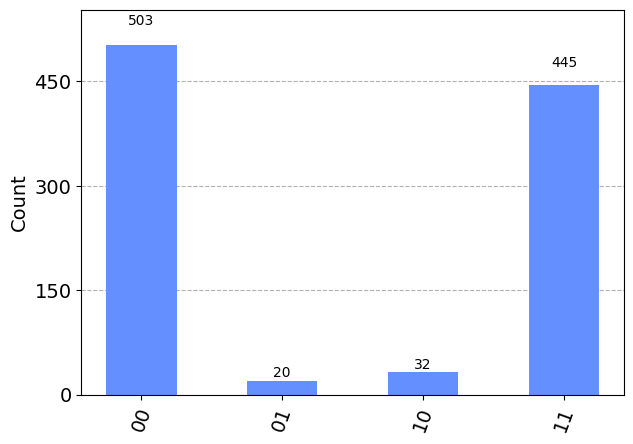

In [22]:
# display the result of the circuit on real quantum computer
result=job.result()
plot_histogram(result.get_counts(circuit))
